In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate
import scipy.interpolate
import numpy as np
import scipy.stats as sts
import seaborn as sns

import test_TOVsolver
import EOS_extension_test

n0 = 0.16 #MeV/fm^3
pi = np.pi
MeV_to_km = 1.323e-6
max_p = 1350 #MeV/fm^3

In [2]:
EOS_small = pd.read_table('../data/EOSCEFTVE1.dat', header=None).to_numpy()

In [3]:
nsamp = 5

EOS_test_cs, EOS_test_lin, EOS_test_poly, causality = EOS_extension_test.extend(EOS_small, nsamp)

MRL_test_cs = test_TOVsolver.solve(EOS_test_cs, max_p)
MRL_test_lin = test_TOVsolver.solve(EOS_test_lin, max_p)
MRL_test_poly = test_TOVsolver.solve(EOS_test_poly, max_p)

C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:76: RuntimeWarning: invalid value encountered in sqrt
  num0 = -2 * y[0] * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:77: RuntimeWarning: invalid value encountered in power
  den0 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 2))
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:81: RuntimeWarning: invalid value encountered in power
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:81: RuntimeWarning: invalid value encountered in sqrt
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:82: RuntimeWarning: invalid value encountered in power
  den1 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 

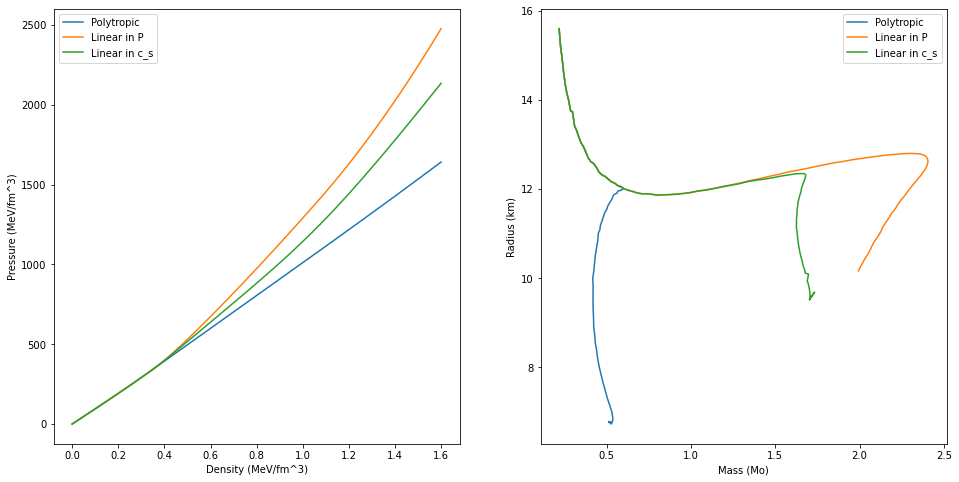

In [4]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].plot(EOS_test_poly[:,0], EOS_test_poly[:,2], label='Polytropic')
ax[0].plot(EOS_test_lin[:,0], EOS_test_lin[:,2], label='Linear in P')
ax[0].plot(EOS_test_cs[:,0], EOS_test_cs[:,2], label='Linear in c_s')
ax[0].set_xlabel('Density (MeV/fm^3)')
ax[0].set_ylabel('Pressure (MeV/fm^3)')
ax[0].legend()

ax[1].plot(MRL_test_poly[:,0], MRL_test_poly[:,1], label='Polytropic')
ax[1].plot(MRL_test_lin[:,0], MRL_test_lin[:,1], label='Linear in P')
ax[1].plot(MRL_test_cs[:,0], MRL_test_cs[:,1], label='Linear in c_s')
ax[1].set_xlabel('Mass (Mo)')
ax[1].set_ylabel('Radius (km)')
ax[1].legend()

In [10]:
# nsim = 1000
# size_ex = 5*EOS_small.shape[0]
# size = size_ex + EOS_small.shape[0] -1

# size_MRL = 80
# MRL_cs_1k = np.zeros((size_MRL, 3, nsim))

# EOS_cs_1k = np.zeros((size, 3, nsim))

# for i in range(nsim):
#     EOS_cs_1k[:,:,i] =  EOS_extension.extend(EOS_small, nsamp, size=size_ex, ext_type='cs')
#     MRL_cs_1k[:,:,i] = test_TOVsolver.solve(EOS_cs_1k[:,:,i], max_p, size=size_MRL)

# np.savetxt("../data/MRL1ksim_cs_M.dat", MRL_cs_1k[:,0,:])
# np.savetxt("../data/MRL1ksim_cs_R.dat", MRL_cs_1k[:,1,:])
# np.savetxt("../data/MRL1ksim_cs_L.dat", MRL_cs_1k[:,2,:])

In [9]:
nsim = 1000
size_MRL = 80
MRL_cs_1k = np.zeros((size_MRL, 3, nsim))

MRL_cs_1k[:,0,:] = np.loadtxt("../data/MRL1ksim_cs_M.dat")
MRL_cs_1k[:,1,:] = np.loadtxt("../data/MRL1ksim_cs_R.dat")
MRL_cs_1k[:,2,:] = np.loadtxt("../data/MRL1ksim_cs_L.dat")

In [15]:
def clean_MRL(MRL_table):
    """
    function to remove all (0,0,0) points from the MRL table when the solver fails
    """

    bool_array = MRL_table[0,:] != 0
    clean_MRL = MRL_table[:,bool_array];
    
    numdel = MRL_table.shape[0] - bool_array.shape[0];
    
    return clean_MRL, numdel

def histo_at_m(MRL_table, mass_line, m_tol = 0.05, bins=50):
    
    nsim = MRL_table.shape[2]
    size_MRL = MRL_table.shape[0]
    
    MRL_slices = np.zeros((3,nsim))

    for i in range(nsim):
        for j in range(size_MRL):
            if MRL_cs_1k[j,0,i] > m_line - m_tol and MRL_cs_1k[j,0,i] < m_line + m_tol:
                MRL_slices[:,i] = MRL_cs_1k[j,:,i]

    clean_slices, numdel = clean_MRL(MRL_slices)

    plt.hist(clean_slices[1,:], bins=bins, density=True)
    plt.xlabel("Radius (km)")
    plt.ylabel("Density")
    
    return clean_slices

array([[1.10730858e+00, 1.10510625e+00, 1.10001337e+00, ...,
        1.10020646e+00, 1.10513806e+00, 1.10410798e+00],
       [1.17873378e+01, 1.19445949e+01, 1.13939133e+01, ...,
        1.14691968e+01, 1.10593149e+01, 1.14078548e+01],
       [1.30477292e+03, 1.48990360e+03, 1.02474241e+03, ...,
        1.08717947e+03, 7.76285366e+02, 1.00780677e+03]])

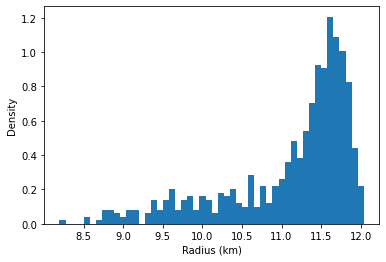

In [18]:
histo_at_m(MRL_cs_1k, 1.5, m_tol=0.01)

In [19]:
def radii_at_m(MRL_table, mass_line, m_tol = 0.05):
    
    nsim = MRL_table.shape[2]
    size_MRL = MRL_table.shape[0]
    
    R_slices = np.zeros(nsim)

    for i in range(nsim):
        for j in range(size_MRL):
            if MRL_cs_1k[j,0,i] > m_line - m_tol and MRL_cs_1k[j,0,i] < m_line + m_tol:
                R_slices[i] = MRL_cs_1k[j,1,i]

    return R_slices

In [21]:
m_start = 1.1
m_end = 1.9
num_m = 5
ms = np.linspace(m_start, m_end, num_m)

radii = []

for m in ms:
    radii.append(radii_at_m(MRL_cs_1k, m, m_tol = 0.01))

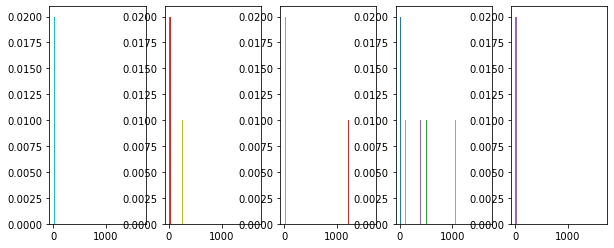

In [25]:
fig, ax = plt.subplots(1,num_m, figsize=(10,4))

for i in range(num_m):
    ax[i].hist(radii[i], bins=50, density=True)